In [129]:
#импорт необходимых библиотек:
#sklearn.neighbors - для реализации метода kNN
#numpy - для работы с данными в векторизованном формате
#пандас - для считывания данных формата csv и построения первых выводов о нашей выборке
import warnings
warnings.filterwarnings('ignore')
from sklearn import neighbors
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('advert.csv') #считываем данные из файла

In [52]:
df.head() #первые пять строк 

,TV,Newspaper,Sales_success
0,230.1,69.2,1.0
1,44.5,45.1,0.0
2,17.2,69.3,0.0
3,151.5,58.5,1.0
4,180.8,58.4,0.0


Строго говоря, первые пять строк нам могут лишь показать совсем малую часть информации, которую содержит наша выборка. Конкретно в этом случае, видим, что ключевым признаком является столбец Sales_success. Два других - TV и Newspaper являются признаками, на которых будет обучаться наша модель. Для того, чтобы алгоритм kNN, да и вообще любой алгоритм работал корректно, необходимо провести анализ и соответствующую предобработку данных. Так как признаков в нашей выборке не так много, для анализа достаточно вывести на экран распределение наших признаков по выборке.

<Figure size 432x288 with 0 Axes>

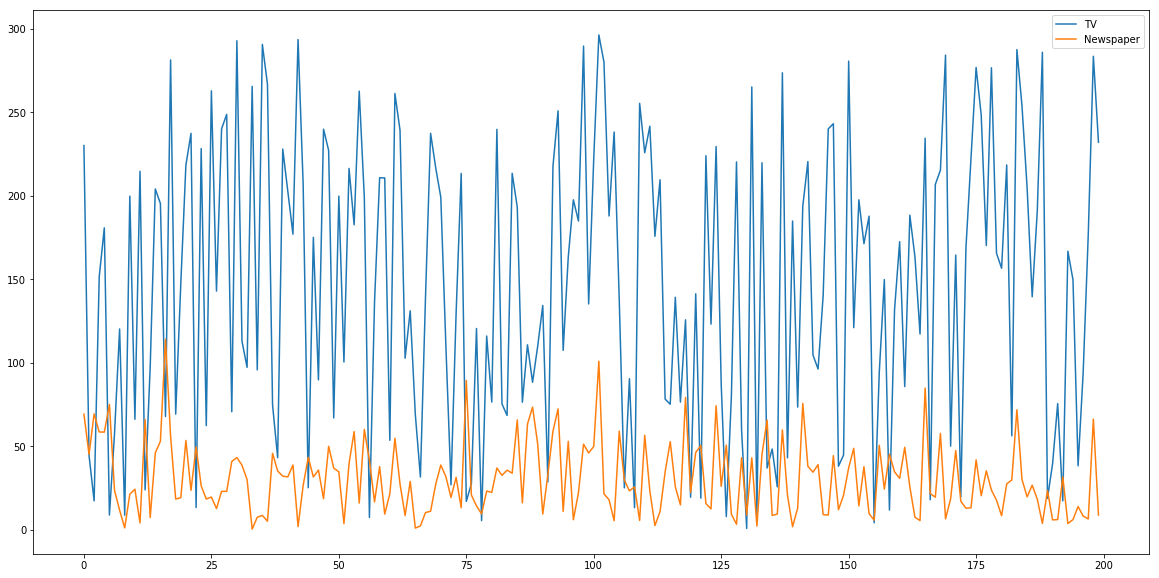

In [53]:
plt.figure()
df.drop(columns = ['Sales_success']).plot(figsize = (20,10))

На приведенном выше графике явно заметно, что признаки, на которых будет обучаться наша модель независимы друг от друга, иначе говоря, отсутствует какая-либо корреляция между ними, но вот масштаб явно разный, подтвердим это конкретными цифрами:

##### Максимальные и минимальные значения признаков

In [5]:
print('TV max =', df['TV'].max())
print('TV min =', df['TV'].min())
print('Newspaper max =', df['Newspaper'].max())
print('Newspaper min =', df['Newspaper'].min())
print('TV mean =', df['TV'].mean())
print('Newspaper mean =', df['Newspaper'].mean())

TV max = 296.4
TV min = 0.7
Newspaper max = 114.0
Newspaper min = 0.3
TV mean = 147.0425
Newspaper mean = 30.553999999999995


И действительно, разница между максимальными и средними значениями действительно велика. Отсутствие разницы между минимальными значениями при наличии вышеупомянутых аргументов - уже не критично, так как уже в любом случае необходимо произвести предобработку наших данных.
Кроме того, для того, чтобы определить оптимальное количество ближайших соседей, мы воспользуемся кросс-валидацией, а также разделим наш датасет на тренировочную и тестовую выборки.

In [69]:
#создаем тренировочную и тестовую выборки в нужном нам форматах
X = np.array(df.drop(columns = ['Sales_success']))
Y = np.array(df['Sales_success']).reshape((200,1))
TV_mean, TV_std = X[:,0].mean(), X[:,0].std()
Newspaper_mean, Newspaper_std = X[:,1].mean(), X[:,1].std()
X[:,0] = (X[:,0] - TV_mean) / TV_std
X[:,1] = (X[:,1] - Newspaper_mean) / Newspaper_std
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)
print('X_train shape =',X_train.shape)
print('X_test shape =',X_test.shape)
print('Y_train shape =', Y_train.shape)
print('Y_test shape =',Y_test.shape)

X_train shape = (160, 2)
X_test shape = (40, 2)
Y_train shape = (160, 1)
Y_test shape = (40, 1)


In [130]:
#create new a knn model
kNN = neighbors.KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
kNN_gscv = GridSearchCV(kNN, param_grid, cv=5)
kNN_gscv.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [131]:
print(kNN_gscv.best_score_)
print(kNN_gscv.best_params_)

0.8
{'n_neighbors': 12}


In [132]:
kNN_gscv.score(X_test, Y_test)

0.775